# Calculation of impulse response of hydrophone

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from meas_data_preprocessing import *
from hydrophone_data_preprocessing import *
from PyDynamic.uncertainty.propagate_DFT import GUM_iDFT

## Load calibration data

In [4]:
meas_scenario = 13
infos, measurement_data = read_data(meas_scenario = meas_scenario)
_, hyd_data = read_calib_data(meas_scenario = meas_scenario, do_plot = False)

Checking if file ../datasets/pD7_MH44.DAT is already present or download it from https://raw.githubusercontent.com/Ma-Weber/Tutorial-Deconvolution/master/MeasuredSignals/pD-Mode%207%20MHz/pD7_MH44.DAT otherwise:
Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.
Checking if file ../datasets/pD7_MH44r.DAT is already present or download it from https://raw.githubusercontent.com/Ma-Weber/Tutorial-Deconvolution/master/MeasuredSignals/pD-Mode%207%20MHz/pD7_MH44r.DAT otherwise:
Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.
Checking if file ../datasets/MW_MH44ReIm.csv is already present or download it from https://raw.githubusercontent.com/Ma-Weber/Tutorial-Deconvolution/master/HydrophoneCalibrationData/MW_MH44ReIm.csv otherwise:
Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.
The file ../datasets/pD7_MH44.DAT was read and it contains 2500 data points.
The t

## Align calibration data with measurement data

In [5]:
# reduce frequency range of calibration data
hyd_data = reduce_freq_range(hyd_data, fmin = 1e6, fmax = 100e6)

In [6]:
measurement_data = uncertainty_from_noisefile(infos, measurement_data, do_plot=False, verbose=False)
measurement_data = calculate_spectrum(measurement_data, do_plot = False)
fmeas = measurement_data["frequency"].round()

In [7]:
hyd_interp = interpolate_hyd(hyd_data, fmeas)

## Transform to time domain to calculate impulse response

In [8]:
H_RI = np.r_[hyd_interp["real"],hyd_interp["imag"]]
U_HRI = np.r_[
    np.c_[np.diag(hyd_interp["varreal"]), hyd_interp["cov"]],
    np.c_[hyd_interp["cov"], np.diag(hyd_interp["varimag"])]]

In [9]:
# application of inverse Fourier transform
imp, Uimp = GUM_iDFT(H_RI, U_HRI)

In [10]:
# centralisation of impulse response
dt = 1/(hyd_interp["frequency"][1] - hyd_interp["frequency"][0])
c_time = linspace(-dt/2,dt/2,np.size(imp))
c_imp = np.fft.fftshift(imp)

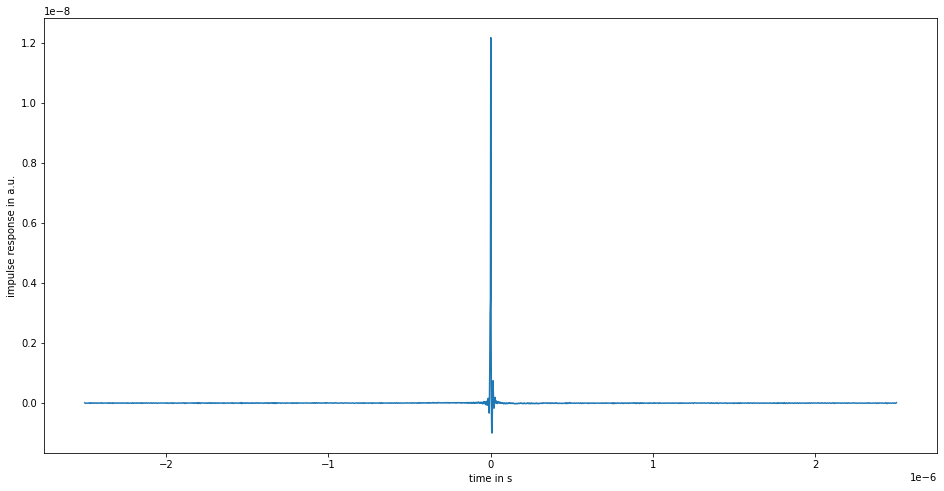

In [11]:
figure(figsize=(16,8))
plot(c_time, c_imp)
xlabel("time in s")
ylabel("impulse response in a.u.");
